In [1]:
import pandas as pd
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
waist_vs_fat = pd.read_csv('body_fat_data.csv')

In [3]:
waist_vs_fat.head()

,Waist_Size,Percent_Body_Fat
0,23.1,17.1
1,24.2,22.2
2,25.1,19.0
3,25.1,22.2
4,26.4,21.2


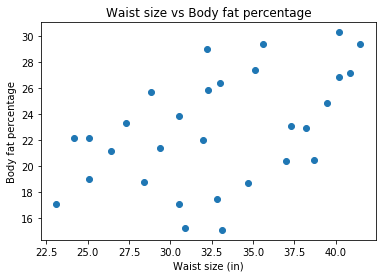

In [4]:
x = np.array(waist_vs_fat['Waist_Size']).reshape(-1,1)
y = np.array(waist_vs_fat['Percent_Body_Fat']).reshape(-1,1)

plt.figure()
plt.scatter(x, y)
plt.xlabel('Waist size (in)')
plt.ylabel('Body fat percentage')
plt.title('Waist size vs Body fat percentage')
plt.show()



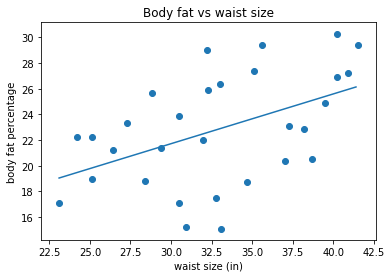

In [5]:

lm = sklearn.linear_model.LinearRegression().fit(x,y)

x_test = np.arange(min(x.ravel()), max(x.ravel()), 0.1).reshape(-1,1)
y_hat = lm.predict(x_test)

plt.figure()
plt.plot(x_test, y_hat)
plt.scatter(x, y)
plt.xlabel('waist size (in)')
plt.ylabel('body fat percentage')
plt.title('Body fat vs waist size')
plt.show()

4 conditions to inference the least squares line
 - linearity
 - independence
 - constant variance
 - nearly normal residuals

Linearity: Satisfied.
Data appears roughly linear

Independence: Satisfied.
Data was taken from independent observations

Constant variance: Satisfied. 
Data does not appear heteroskedastic. Can be verifid with analysis of residuals below. 

Nearly normal residuals:
We can analyze residuals by plotting them vs waist size and by looking at a histogram of them

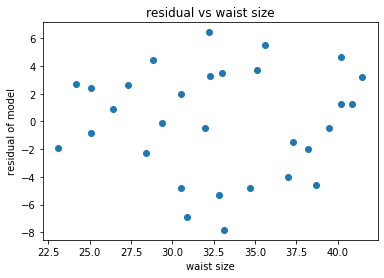

In [6]:
plt.figure()
plt.scatter(x, y - lm.predict(x))
plt.xlabel('waist size')
plt.ylabel('residual of model')
plt.title('residual vs waist size')
plt.show()

Let's make a trendline to see if the residuals are skewed.

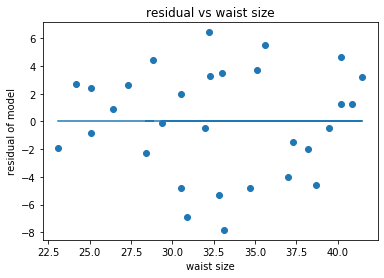

In [7]:
lm2 = sklearn.linear_model.LinearRegression().fit(x,y - lm.predict(x))

plt.figure()
plt.scatter(x, y - lm.predict(x))
plt.plot(x, lm2.predict(x))
plt.xlabel('waist size')
plt.ylabel('residual of model')
plt.title('residual vs waist size')
plt.show()

The residuals are relatively constant. Our model is not obviously biased.


Let's consider the magnitude of the residuals.

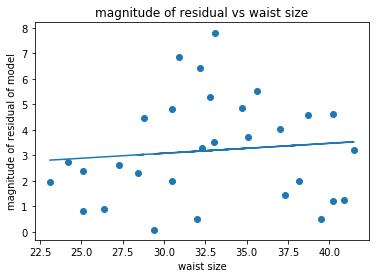

In [8]:
lm3 = sklearn.linear_model.LinearRegression().fit(x,abs(y - lm.predict(x)))

plt.figure()
plt.scatter(x, abs(y - lm.predict(x)))
plt.plot(x, lm3.predict(x))
plt.xlabel('waist size')
plt.ylabel('magnitude of residual of model')
plt.title('magnitude of residual vs waist size')
plt.show()


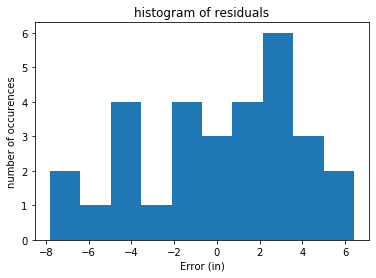

In [9]:
plt.figure()
plt.hist(y - lm.predict(x))
plt.title('histogram of residuals')
plt.xlabel('Error (in)')
plt.ylabel('number of occurences')
plt.show()


The residuals look somewhat normal. It might be possible to say that the distribution is not unimodal. With this many datapoints, it's difficult to see if our residuals have a skew. 

In [10]:
from statsmodels.api import OLS
import statsmodels.api as sm
x= sm.add_constant(x)
OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     8.284
Date:                Wed, 15 Apr 2020   Prob (F-statistic):            0.00757
Time:                        22:46:02   Log-Likelihood:                -82.322
No. Observations:                  30   AIC:                             168.6
Df Residuals:                      28   BIC:                             171.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0762      4.479      2.250      0.033       0.902      19.250
x1             0.3880      0.135      2.878      0.008       0.112       0.664
==============================================================================
Omnibus:                        2.076   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.476
Skew:                          -0.326   Prob(JB):                        0.478
Kurtosis:                       2.131   Cond. No.                         209.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R code for analysis of variance

wbfp <- read.csv("C:/Users/reidw/Desktop/stats_project_1/body_fat_data.csv")
linearMod <- lm(Percent_Body_Fat ~ Waist_Size, data=wbfp)
plot(x=wbfp$Waist_Size, y=wbfp$Percent_Body_Fat, pch = 16, cex = 1.3, col = "blue", main="Waist vs Body Fat", xlab = "Waist Size (in)", ylab="Body Fat Percentage")
abline(linearMod)
lm_summary <- summary(linearMod)
print(lm_summary)

anova_one_way <- aov(Percent_Body_Fat ~ Waist_Size, data=wbfp)
summary(anova_one_way)
